# Perimeter International Scholars, March 21 - April 8 2016
### Explorations in Condensed Matter Theory
# Many-body entanglement and tensor networks
 



Guifre Vidal, Perimeter Institute

# IJulia II: quantum spin chain

In [41]:
using LinearAlgebra

In [73]:
# Hamiltonian
function buildH(N,h) #Función del número de spines (N) y la intensidad del campo magnetico transversal aplicado (h).
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    I = [1 0; 0 1]
    XX = kron(X,X)
    H = -XX - h*(kron(Z,I) + kron(I,Z))
    
    for n = 3:N
        
        A1 = rand(2^(n-2),2^(n-2))
        B1 = diagm(0=>fill(1., size(A,1)))    
        H = kron(H,I)-kron(B1,XX)-h*kron(B1,Z)
        
    end
    
    A2 = rand(2^(N-2),2^(N-2))
    B2 = diagm(0=>fill(1., size(A,1)))
    H = H - kron(X,kron(B2,X))
    return H
end

#buildH(3,1)

buildH (generic function with 1 method)

In [70]:
A = rand(5,5)
B = diagm(0=>fill(1., size(A,1)))

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [71]:
B

5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [64]:
# Pauli matrices X and Z, and identity matrix I
X = [0. 1; 1 0]
Z = [1. 0; 0 -1]

#I
#I = [1 0; 0 1]
#I = eye(2)
XX = kron(X,X)

4×4 Matrix{Float64}:
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0

### Let us build the Hamiltonian for N spins
($N=14$ takes a few seconds; do NOT try $N=16$ -- requires too much time and memory)

In [57]:
N = 3
h = 1.0 # magnetic field
XX = [0. 1; 1 0]
Z = [1. 0; 0 -1]
X = [0. 1; 1 0]
I2 = I

H = -kron(XX, XX) - h * (kron(Z, I2) + kron(I2, Z))


4×4 Matrix{Float64}:
 -2.0  -0.0  -0.0  -1.0
 -0.0  -0.0  -1.0  -0.0
 -0.0  -1.0  -0.0  -0.0
 -1.0  -0.0  -0.0   2.0

In [62]:
kron(kron(I2,I2^1),I2)

8×8 Matrix{Int64}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0
 0  0  0  0  1  0  0  0
 0  0  0  0  0  1  0  0
 0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  1

In [20]:
N = 3
h = 1.0 # magnetic field
XX = [0. 1; 1 0]
Z = [1. 0; 0 -1]
X = [0. 1; 1 0]
I2 = I

H = -kron(XX, XX) - h * (kron(Z, I2) + kron(I2, Z))

for n = 3:N
    H = kron(H, I2) - kron(kron(I2, I2^(n-2)), XX) - h * kron(kron(I2, I2^(n-1)), Z)
end

#Aqui se hace el producto tensorial con la nueva identidad, el segundo termino realiza la introducción de la componente XX de los nuevos espines. El último termino introduce el campo magnetico (Z) actuando en el último spin
end
H = H - kron(X, kron(I2^(N-2), X))


8×8 Matrix{Float64}:
 -3.0  -1.0  -0.0  -0.0  -0.0  -1.0  -1.0  -0.0
 -1.0  -1.0  -0.0   0.0  -1.0   0.0  -0.0  -1.0
 -0.0  -0.0  -1.0  -1.0  -1.0  -0.0  -0.0  -1.0
 -0.0   0.0  -1.0   1.0  -0.0  -1.0  -1.0   0.0
 -0.0  -1.0  -1.0  -0.0  -1.0  -1.0  -0.0  -0.0
 -1.0   0.0  -0.0  -1.0  -1.0   1.0  -0.0   0.0
 -1.0  -0.0  -0.0  -1.0  -0.0  -0.0   1.0  -1.0
 -0.0  -1.0  -1.0   0.0  -0.0   0.0  -1.0   3.0

In [ ]:
# Ising Hamiltonian for N spins  with exact diagonalization
N = 3
h = 1.0 # magnetic field
H = -XX - h*(kron(Z,I) + kron(I,Z))
for n = 3:N
    H = kron(H,I)-kron(eye(2^(n-2)),XX)-h*kron(eye(2^(n-1)),Z) #Aqui se hace el producto tensorial con la nueva identidad, el segundo termino realiza la introducción de la componente XX de los nuevos espines. El último termino introduce el campo magnetico (Z) actuando en el último spin
end
H = H - kron(X,kron(eye(2^(N-2)),X))


### Function that builds the Hamiltonian

In [29]:
# Hamiltonian
function buildH(N,h) #Función del número de spines y el
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    I = eye(2)
    XX = kron(X,X)
    H = -XX - h*(kron(Z,I) + kron(I,Z))
    
    for n = 3:N
        H = kron(H,I)-kron(eye(2^(n-2)),XX)-h*kron(eye(2^(n-1)),Z)
    end

    H = H - kron(X,kron(eye(2^(N-2)),X))
    return H
end

buildH(3,1)

LoadError: DimensionMismatch: dimensions must match: a has dims (Base.OneTo(8), Base.OneTo(8)), b has dims (Base.OneTo(16), Base.OneTo(16)), mismatch at 1

### Spectrum of energy eigenvalues

In [22]:
# Energy spectrum
N=8  # spin chain size   N=10 and Nh = 21 takes approx 10 seconds
h_max = 2 # range of magnetic field
Nh=21  # number of values of magnetic field
delta_h = h_max/(Nh-1)
hval = collect(0:delta_h:h_max) # list of magnetix fields to be considered
Energies = zeros(2^N,Nh)
for i=1:Nh
    H = buildH(N,hval[i]) # build the Hamiltonian
    D,U = eig(H)          # diagonalize the Hamiltonian
    Energies[:,i] = D
end

### Let us plot the spectrum of H as a function of the magnetic field

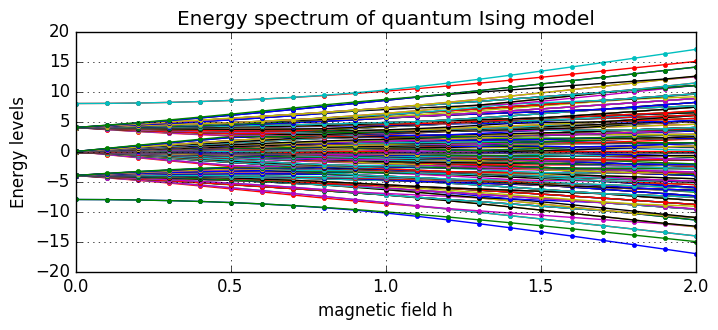

PyObject <matplotlib.text.Text object at 0x000000001ED09278>

In [23]:
using PyPlot
figure("My_best_figure_ever",figsize=(8,3))
grid("on")

for i=1:2^N
    plot(hval,vec(Energies[i,:]), marker=".")
end

title("Energy spectrum of quantum Ising model")
xlabel("magnetic field h")
ylabel("Energy levels")

# Let us study the quantum critical point at $h=1$
### (From now on, the material is in preparation for today's tutorial)


### Translation operator 

In [10]:
# Translation operator 
function buildT(N) 
    SWAP = [1. 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
    I = eye(2)
    T = SWAP
    SWAPn = SWAP
    for i=3:N
        T = kron(T,I)
        SWAPn = kron(I,SWAPn)
        T = T*SWAPn
    end
    return T
end
T = buildT(5)

32x32 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

### Symmetry Operator for global spin flip 

In [11]:
# symmetry operator
function buildS(N)
    Z = [1 0; 0 -1]
    S = Z
    for i=2:N
        S = kron(S,Z)
    end
    return S
end
buildS(4)

16x16 Array{Int64,2}:
 1   0   0  0   0  0  0   0   0  0  0   0  0   0   0  0
 0  -1   0  0   0  0  0   0   0  0  0   0  0   0   0  0
 0   0  -1  0   0  0  0   0   0  0  0   0  0   0   0  0
 0   0   0  1   0  0  0   0   0  0  0   0  0   0   0  0
 0   0   0  0  -1  0  0   0   0  0  0   0  0   0   0  0
 0   0   0  0   0  1  0   0   0  0  0   0  0   0   0  0
 0   0   0  0   0  0  1   0   0  0  0   0  0   0   0  0
 0   0   0  0   0  0  0  -1   0  0  0   0  0   0   0  0
 0   0   0  0   0  0  0   0  -1  0  0   0  0   0   0  0
 0   0   0  0   0  0  0   0   0  1  0   0  0   0   0  0
 0   0   0  0   0  0  0   0   0  0  1   0  0   0   0  0
 0   0   0  0   0  0  0   0   0  0  0  -1  0   0   0  0
 0   0   0  0   0  0  0   0   0  0  0   0  1   0   0  0
 0   0   0  0   0  0  0   0   0  0  0   0  0  -1   0  0
 0   0   0  0   0  0  0   0   0  0  0   0  0   0  -1  0
 0   0   0  0   0  0  0   0   0  0  0   0  0   0   0  1

### Simultaneous diagonalization of $H$, $T$, and $S$

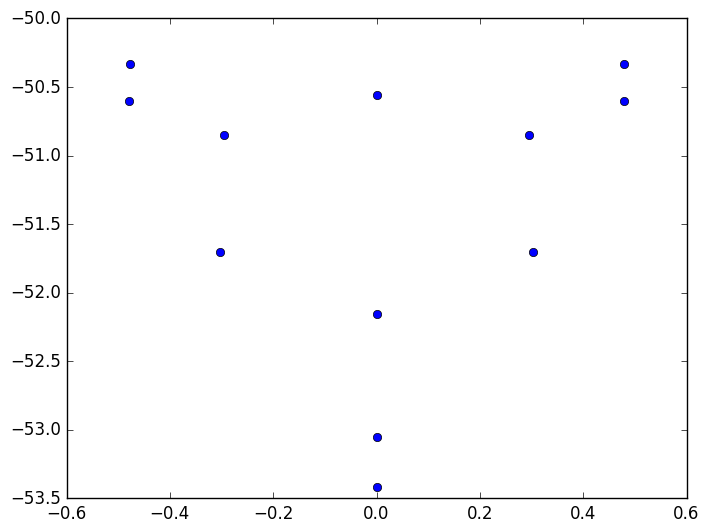

12-element Array{Complex{Float64},1}:
 -53.4183+0.0im     
 -53.0485+0.0im     
 -52.1518+0.0im     
 -51.7044+0.302071im
 -51.7044-0.302071im
 -50.8512+0.29591im 
 -50.8512-0.29591im 
 -50.5995+0.478792im
 -50.5995-0.478792im
 -50.5566+0.0im     
 -50.3312+0.478157im
 -50.3312-0.478157im

In [21]:
N = 10  # size of the spin chain (N not larger than 12)
Nstates = 12
H = buildH(N,1) - 4*N*eye(2^N)
T = buildT(N)
S = buildS(N)
D,U = eigs(H*(eye(2^N) + 0.01*T +0.002*S),nev=Nstates);
plot(imag(D), real(D), marker = "o", linestyle ="" )
D

### Extract energy, momentum, and parity of an individual energy eigenstate

In [18]:
Psi = U[:,1]
E = Psi'*H*Psi
E = real(E)[1]+4N

K = angle(Psi'*T*Psi)
K = real(K)[1]

p = Psi'*S*Psi
p = -(real(p)[1]-1)/2

println("This energy eigenstate has energy $E, momentum $p, and parity ", round(Int,p), ".")

This energy eigenstate has energy -12.784906442999116, momentum -0.0, and parity 0.


## Conformal data: Scaling dimension $\Delta \equiv h + \bar{h}$ and conformal spin $s \equiv h - \bar{h}$
### Periodic Boundary Conditions (PBC): conformal towers of identity, spin and energy density primaries

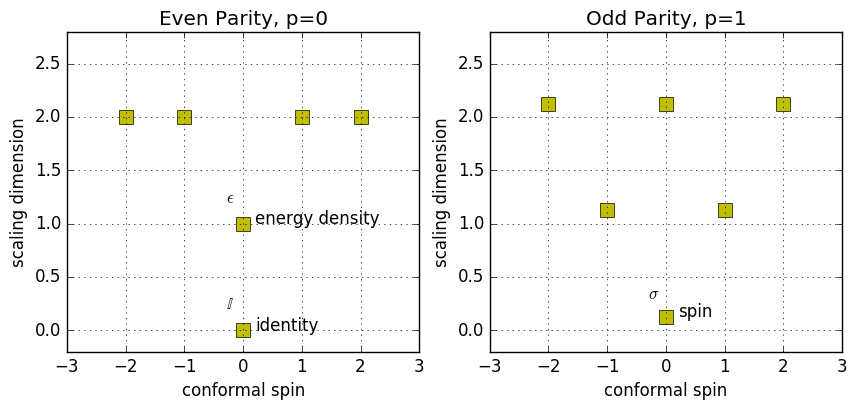

In [19]:
-

### Anti-Periodic Boundary Conditions (APBC): conformal towers of disorder and fermions primaries

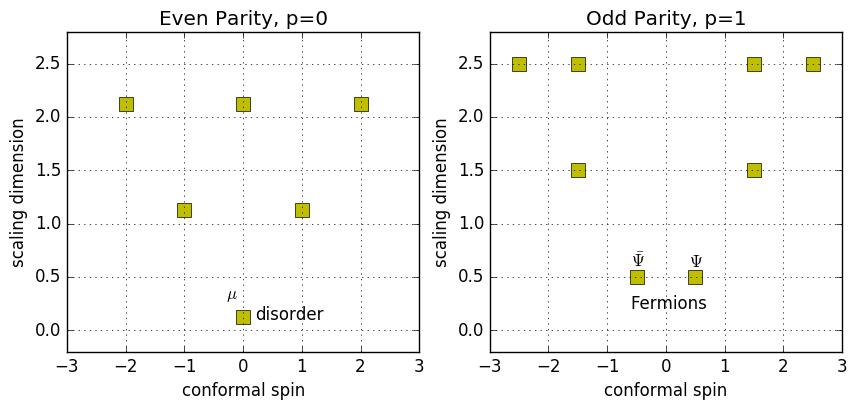

In [20]:
Ndim = 14
Delta = [1/8 1/2 1/2 1+1/8 1+1/8 1+1/2 1+1/2 2+1/8 2+1/8 2+1/8 2+1/2 2+1/2 2+1/2 2+1/2]
spin = [0 1/2 -1/2 1 -1 1+1/2 -1-1/2 2 0 -2 2+1/2 1+1/2 -1-1/2 -2-1/2]
parity = [0 1 1 0 0 1 1 0 0 0 1 1 1 1]

figure("conformal_data_apbc",figsize=(10,4))
subplot(121) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Even Parity, p=0")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("disorder", xy=[0.2;0.1])
annotate(L"$\mu$", xy=[-0.3;0.3])

subplot(122) # Create the 1st axis of a 2x2 arrax of axes
grid("on") # Create a grid on the axis
title("Odd Parity, p=1")
ax = gca()
ax[:set_xlim]([-3,3])
ax[:set_ylim]([-0.2,2.8])
xlabel("conformal spin")
ylabel("scaling dimension")
annotate("Fermions", xy=[-.6;0.2])
annotate(L"$\Psi$", xy=[0.4;0.6])
annotate(L"$\bar{\Psi}$", xy=[-0.6;0.6])
for i=1:Ndim
    if parity[i] == 0
        subplot(121)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y",)
    elseif parity[i] == 1
        subplot(122)
        plot(spin[i],Delta[i], marker = "s", markersize = 10, color = "y")
    end
end    


### Let us add antiperiodic boundary conditions to H and T 

In [ ]:
#Hamiltonian operator

function buildH(N,h,bc=1) # choose bc=1 (default) for PBC and bc=-1 for APBC
    X = [0. 1; 1 0]
    Z = [1. 0; 0 -1]
    I = eye(2)
    XX = kron(X,X)
    
    H = -XX - h*(kron(Z,I) + kron(I,Z))
    II = I
    for n = 3:N
        H = kron(H,I)-kron(II,XX)-h*kron(II,kron(I,Z))
        II = kron(II,I)
    end
    H = H - bc*kron(X,kron(eye(2^(N-2)),X)) # notice the APBC
    return H
end

# Translation operator 

function buildT(N,bc=1) # choose bc=1 (default) for PBC and bc=-1 for APBC
    SWAP = [1. 0 0 0; 0 0 1 0; 0 1 0 0; 0 0 0 1]
    I = eye(2)
    T = SWAP
    SWAPn = SWAP
    for i=3:N
        T = kron(T,I)
        SWAPn = kron(I,SWAPn)
        T = T*SWAPn
    end
    if bc==-1
        Z1 = [1 0; 0 -1]
        for n=2:N
            Z1 = kron(Z1,I)
        end
        T = Z1*T
    end
    return T
end


# Test 1: periodic
#H = buildH(5,1,1)
#T = buildT(5,1)
#T*H-H*T

# Test 2: anti-periodic
#H = buildH(5,1,-1)
#T = buildT(5,-1)
#T*H-H*T

### Enjoy the tutorial! 